# Supp Fig 2a | Spatial structure for the human intestine tissue

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

project_name = 'A1_12_global'
cmap='viridis'
pc_fea = np.load(f'result/{project_name}/merge.npy')
merge_position = pd.read_csv(f'result/{project_name}/colData.csv')
merge_row = merge_position['image_row'].tolist()
merge_col = merge_position['image_col'].tolist()

In [2]:
all_position = pd.read_csv(f'result/{project_name}/filtered_tissue_position_with_center.csv')
row_all = all_position['image_row'].tolist()
col_all = all_position['image_col'].tolist()
region_label = np.load(f'result/{project_name}/A1_region_label.npy')

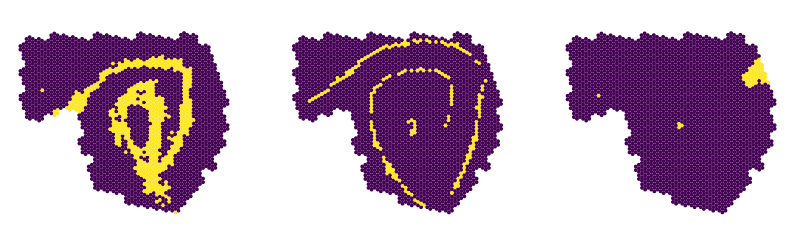

In [3]:
enhance_position = pd.read_csv(f'result/{project_name}/reordered_position.csv')
row_ = enhance_position['image_row'].tolist()
col_ = enhance_position['image_col'].tolist()
idx = (enhance_position['index']-1).tolist()


filtered_label = region_label[idx]
fig = plt.figure(figsize=(10, 3), dpi=100)
count = 0
for i in [2, 3, 6]:
    count += 1
    ax = fig.add_subplot(1, 3, count)
    plt.axis("equal")
    plt.axis('off')
    plt.scatter(row_, col_, s=3,
                marker = 'o',
                c=filtered_label==i,
                cmap=cmap,
                )

# plt.savefig(f'../paper/NNfig/Fig2/Merge.pdf')
plt.show()

In [4]:
def slicing(array, a=6, b=7):
    """
    get array sliced with q in (0, 1]
    Args:
        array: a numpy array with length of len.
        q: a ratio determining how many elements to remain.

    Returns: array[ : int(q*len)]
    """
    reult = []
    for i in range(len(array)//b):
        slice_ = array[i*b:i*b+b]
        new_array = slice_[:a]
        reult += new_array.tolist()
    return np.array(reult)


row_q = slicing(np.array(row_))
col_q = slicing(np.array(col_))
label_q = slicing(filtered_label)

In [5]:
np.save(f'result/{project_name}/reordered_label.npy', filtered_label)

In [6]:
from postprocess import Numpy2Image as n2i
from postprocess import Result2Csv as r2c
import numpy as np
import pandas as pd

project_name = 'A1_12_global'
exp_name = 'svae_A1_nn9_n'
folder_name = f'result/{project_name}/{exp_name}'

In [7]:
grid = 7

fea = np.load(f'{folder_name}/infer_subspot.npy')
mean_fea = np.zeros((fea.shape[0]//grid, fea.shape[1]))
spot_num = fea.shape[0]//grid
for i in range(spot_num):
    fea_sub = fea[i * grid :(i + 1) * grid]
    mean_fea[i] = np.mean(fea_sub, axis=0)
    
np.save(f'result/{project_name}/{exp_name}_pc.npy', fea)
pd.DataFrame(fea).to_csv(f'result/{project_name}/{exp_name}_pc.csv')

In [8]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr
from scipy.stats import wasserstein_distance as WD
import seaborn as sns
import matplotlib.pyplot as plt

project_name = 'A1_12_global'

data = pd.read_csv(f'result/{project_name}/reordered_count.csv', index_col=0)
data_spatial_1 = pd.read_csv(f'result/{project_name}/bayesspace_count_2.csv', index_col=0)
data_spatial_2 = pd.read_csv(f'result/{project_name}/interpolation_linear.csv')
data_spatial_3 = pd.read_csv(f'result/{project_name}/gp.csv')

data_cross_0 = pd.read_csv(f'result/{project_name}/a1_XFuse_SR.csv', index_col=0)
data_cross_1 = pd.read_csv(f'result/{project_name}/g2p_linear.csv')
data_cross_2 = pd.read_csv(f'result/{project_name}/g2p_gaussian_process_2.csv')
data_cross_3 = pd.read_csv(f'result/{project_name}/g2p_mlp_32.csv')

data_ours = pd.read_csv(f'result/{project_name}/{exp_name}_pc.csv', index_col=0)
data_control = pd.read_csv(f'result/{project_name}/hvg_merge.csv', index_col=0)
position = pd.read_csv(f'result/{project_name}/reordered_position.csv')

row = np.array(position['image_row'].tolist())
col = np.array(position['image_col'].tolist())

r_position = pd.read_csv(f'result/{project_name }/colData.csv')

row_r = r_position['image_row']
col_r = r_position['image_col']

width = 3 / 2 * np.mean(row)
height = 3 / 2 * np.mean(col)


genes = pd.read_csv(f'result/{project_name }/HVG_9.csv')['Gene'].tolist()
print(genes)

['MT1G', 'FABP1', 'EPCAM', 'CNN1', 'MYH11', 'TAGLN', 'PTPRC', 'HLA-DRA', 'CD74']


In [9]:
data = data.clip(lower=0)
data_spatial_1 = data_spatial_1.clip(lower=0)
data_spatial_2 = data_spatial_2.clip(lower=0)
data_spatial_3 = data_spatial_3.clip(lower=0)
data_cross_0 = data_cross_0.clip(lower=0)
data_cross_1 = data_cross_1.clip(lower=0)
data_cross_2 = data_cross_2.clip(lower=0)
data_cross_3 = data_cross_3.clip(lower=0)
data_ours = data_ours.clip(lower=0)
data_control = data_control.clip(lower=0)

In [10]:
data_ours.columns = genes
data_ours

,MT1G,FABP1,EPCAM,CNN1,MYH11,TAGLN,PTPRC,HLA-DRA,CD74
0,0.774126,16.997051,8.910179,0.137457,0.385208,1.137114,0.010015,0.121250,0.348273
1,0.700851,18.401894,7.384587,0.164974,0.526157,1.444880,0.013702,0.166403,0.478912
2,0.635226,13.392070,5.286686,0.143873,0.352811,1.318174,0.014213,0.129488,0.413038
3,0.942876,10.607399,3.946824,0.222212,0.492285,1.560791,0.024949,0.194742,0.532598
4,1.043598,16.884443,7.249823,0.177090,0.417271,1.631515,0.010801,0.157767,0.516006
...,...,...,...,...,...,...,...,...,...
2417,0.297157,1.107499,0.796615,0.158058,0.307243,1.368416,0.049693,0.163743,0.443953
2418,0.282553,2.057682,0.905653,0.048053,0.116632,1.158969,0.026101,0.158326,0.481752
2419,0.243304,1.507515,0.544236,0.156278,0.381507,2.798677,0.026793,0.101342,0.387715
2420,0.104584,2.012591,0.727571,0.075887,0.220560,1.107079,0.022633,0.108796,0.345731


In [11]:
data_ours.to_csv(f'result/{project_name}/ours.csv')

In [12]:
def slicing(array, a=6, b=7):
    """
    get array sliced with q in (0, 1]
    Args:
        array: a numpy array with length of len.
        q: a ratio determining how many elements to remain.

    Returns: array[ : int(q*len)]
    """
    reult = []
    for i in range(len(array)//b):
        slice_ = array[i*b:i*b+b]
        new_array = slice_[:a]
        reult += new_array.tolist()
    return reult


row_q = slicing(row)
col_q = slicing(col)

In [13]:
## reorder bayesspace

index = data_spatial_1.index
index_num = []
for idx in index:
    index_num.append(float(idx.split('_')[-1]))

data_spatial_1['order'] = index_num
data_spatial_1_sorted = data_spatial_1.sort_values(by="order",ascending=True)
data_spatial_1_sorted.to_csv(f'result/{project_name}/bayesspace_sorted.csv')

In [14]:
row_number = 1


pearson_ours_list = []
spearman_ours_list = []

pearson_spatial_1_list = []
spearman_spatial_1_list = []
pearson_spatial_2_list = []
spearman_spatial_2_list = []
pearson_spatial_3_list = []
spearman_spatial_3_list = []

pearson_cross_0_list = []
spearman_cross_0_list = []
pearson_cross_1_list = []
spearman_cross_1_list = []
pearson_cross_2_list = []
spearman_cross_2_list = []
pearson_cross_3_list = []
spearman_cross_3_list = []

mse_ours_list = []
mse_spatial_1_list = []
mse_spatial_2_list = []
mse_spatial_3_list = []
mse_cross_0_list = []
mse_cross_1_list = []
mse_cross_2_list = []
mse_cross_3_list = []

wd_ours_list = []
wd_spatial_1_list = []
wd_spatial_2_list = []
wd_spatial_3_list = []
wd_cross_0_list = []
wd_cross_1_list = []
wd_cross_2_list = []
wd_cross_3_list = []

for i in range(len(genes)):
    gene = genes[i]

    exp_gt = data[gene]
    print(f'------------------{gene}-------------------------')
    exp_gt_q = slicing(exp_gt)
    exp_control = data_control[gene]
    exp_ours = data_ours[gene]

    exp_spatial_1 = data_spatial_1_sorted[gene]
    exp_spatial_2 = data_spatial_2[gene]
    exp_spatial_3 = data_spatial_3[gene]
    
    exp_cross_0 = data_cross_0[gene]
    exp_cross_1 = data_cross_1[gene]
    exp_cross_2 = data_cross_2[gene]
    exp_cross_3 = data_cross_3[gene]

    # pearson
    pearson_ours, _ = pearsonr(exp_gt, exp_ours)
    pearson_spatial_1, _ = pearsonr(exp_gt_q, exp_spatial_1)
    pearson_spatial_2, _ = pearsonr(exp_gt, exp_spatial_2)
    pearson_spatial_3, _ = pearsonr(exp_gt, exp_spatial_3)
    
    pearson_cross_0, _ = pearsonr(exp_gt, exp_cross_0)
    pearson_cross_1, _ = pearsonr(exp_gt, exp_cross_1)
    pearson_cross_2, _ = pearsonr(exp_gt, exp_cross_2)
    pearson_cross_3, _ = pearsonr(exp_gt, exp_cross_3)

    pearson_ours_list.append(pearson_ours)
    pearson_spatial_1_list.append(pearson_spatial_1)
    pearson_spatial_2_list.append(pearson_spatial_2)
    pearson_spatial_3_list.append(pearson_spatial_3)
    pearson_cross_0_list.append(pearson_cross_0)
    pearson_cross_1_list.append(pearson_cross_1)
    pearson_cross_2_list.append(pearson_cross_2)
    pearson_cross_3_list.append(pearson_cross_3)
    print(pearson_spatial_1, pearson_cross_0, pearson_ours)

    # mse
    mse_ours = mean_squared_error(exp_gt, exp_ours)
    mse_s_1 = mean_squared_error(exp_gt_q, exp_spatial_1)
    mse_s_2 = mean_squared_error(exp_gt, exp_spatial_2)
    mse_s_3 = mean_squared_error(exp_gt, exp_spatial_3)
    mse_c_0 = mean_squared_error(exp_gt, exp_cross_0)
    mse_c_1 = mean_squared_error(exp_gt, exp_cross_1)
    mse_c_2 = mean_squared_error(exp_gt, exp_cross_2)
    mse_c_3 = mean_squared_error(exp_gt, exp_cross_3)

    mse_ours_list.append(mse_ours)
    mse_spatial_1_list.append(mse_s_1)
    mse_spatial_2_list.append(mse_s_2)
    mse_spatial_3_list.append(mse_s_3)
    mse_cross_0_list.append(mse_c_0)
    mse_cross_1_list.append(mse_c_1)
    mse_cross_2_list.append(mse_c_2)
    mse_cross_3_list.append(mse_c_3)

------------------MT1G-------------------------
0.5547431823965729 0.2309869440063426 0.5518183583546189
------------------FABP1-------------------------
0.6897595482654604 0.3422283446316031 0.7315790648609473
------------------EPCAM-------------------------
0.6349686893177717 0.3810730042285923 0.6654398618093332
------------------CNN1-------------------------
0.5675593359191603 0.5964088655166229 0.7003091744599994
------------------MYH11-------------------------
0.5552856124575081 0.6121119903601118 0.7430169909063553
------------------TAGLN-------------------------
0.633721713645551 0.6558015777349955 0.7769725441353637
------------------PTPRC-------------------------
0.4616745229896936 0.08911556339197285 0.6700147016555655
------------------HLA-DRA-------------------------
0.6202507629099777 0.16038438919655024 0.649442810052795
------------------CD74-------------------------
0.7334825721347652 0.17124006220473836 0.7680570292871831


# Supp Fig 2b | Spatial visualization of 9 marker gene expressions

------------------MT1G-------------------------
------------------FABP1-------------------------
------------------EPCAM-------------------------
------------------CNN1-------------------------
------------------MYH11-------------------------
------------------TAGLN-------------------------
------------------PTPRC-------------------------
------------------HLA-DRA-------------------------
------------------CD74-------------------------


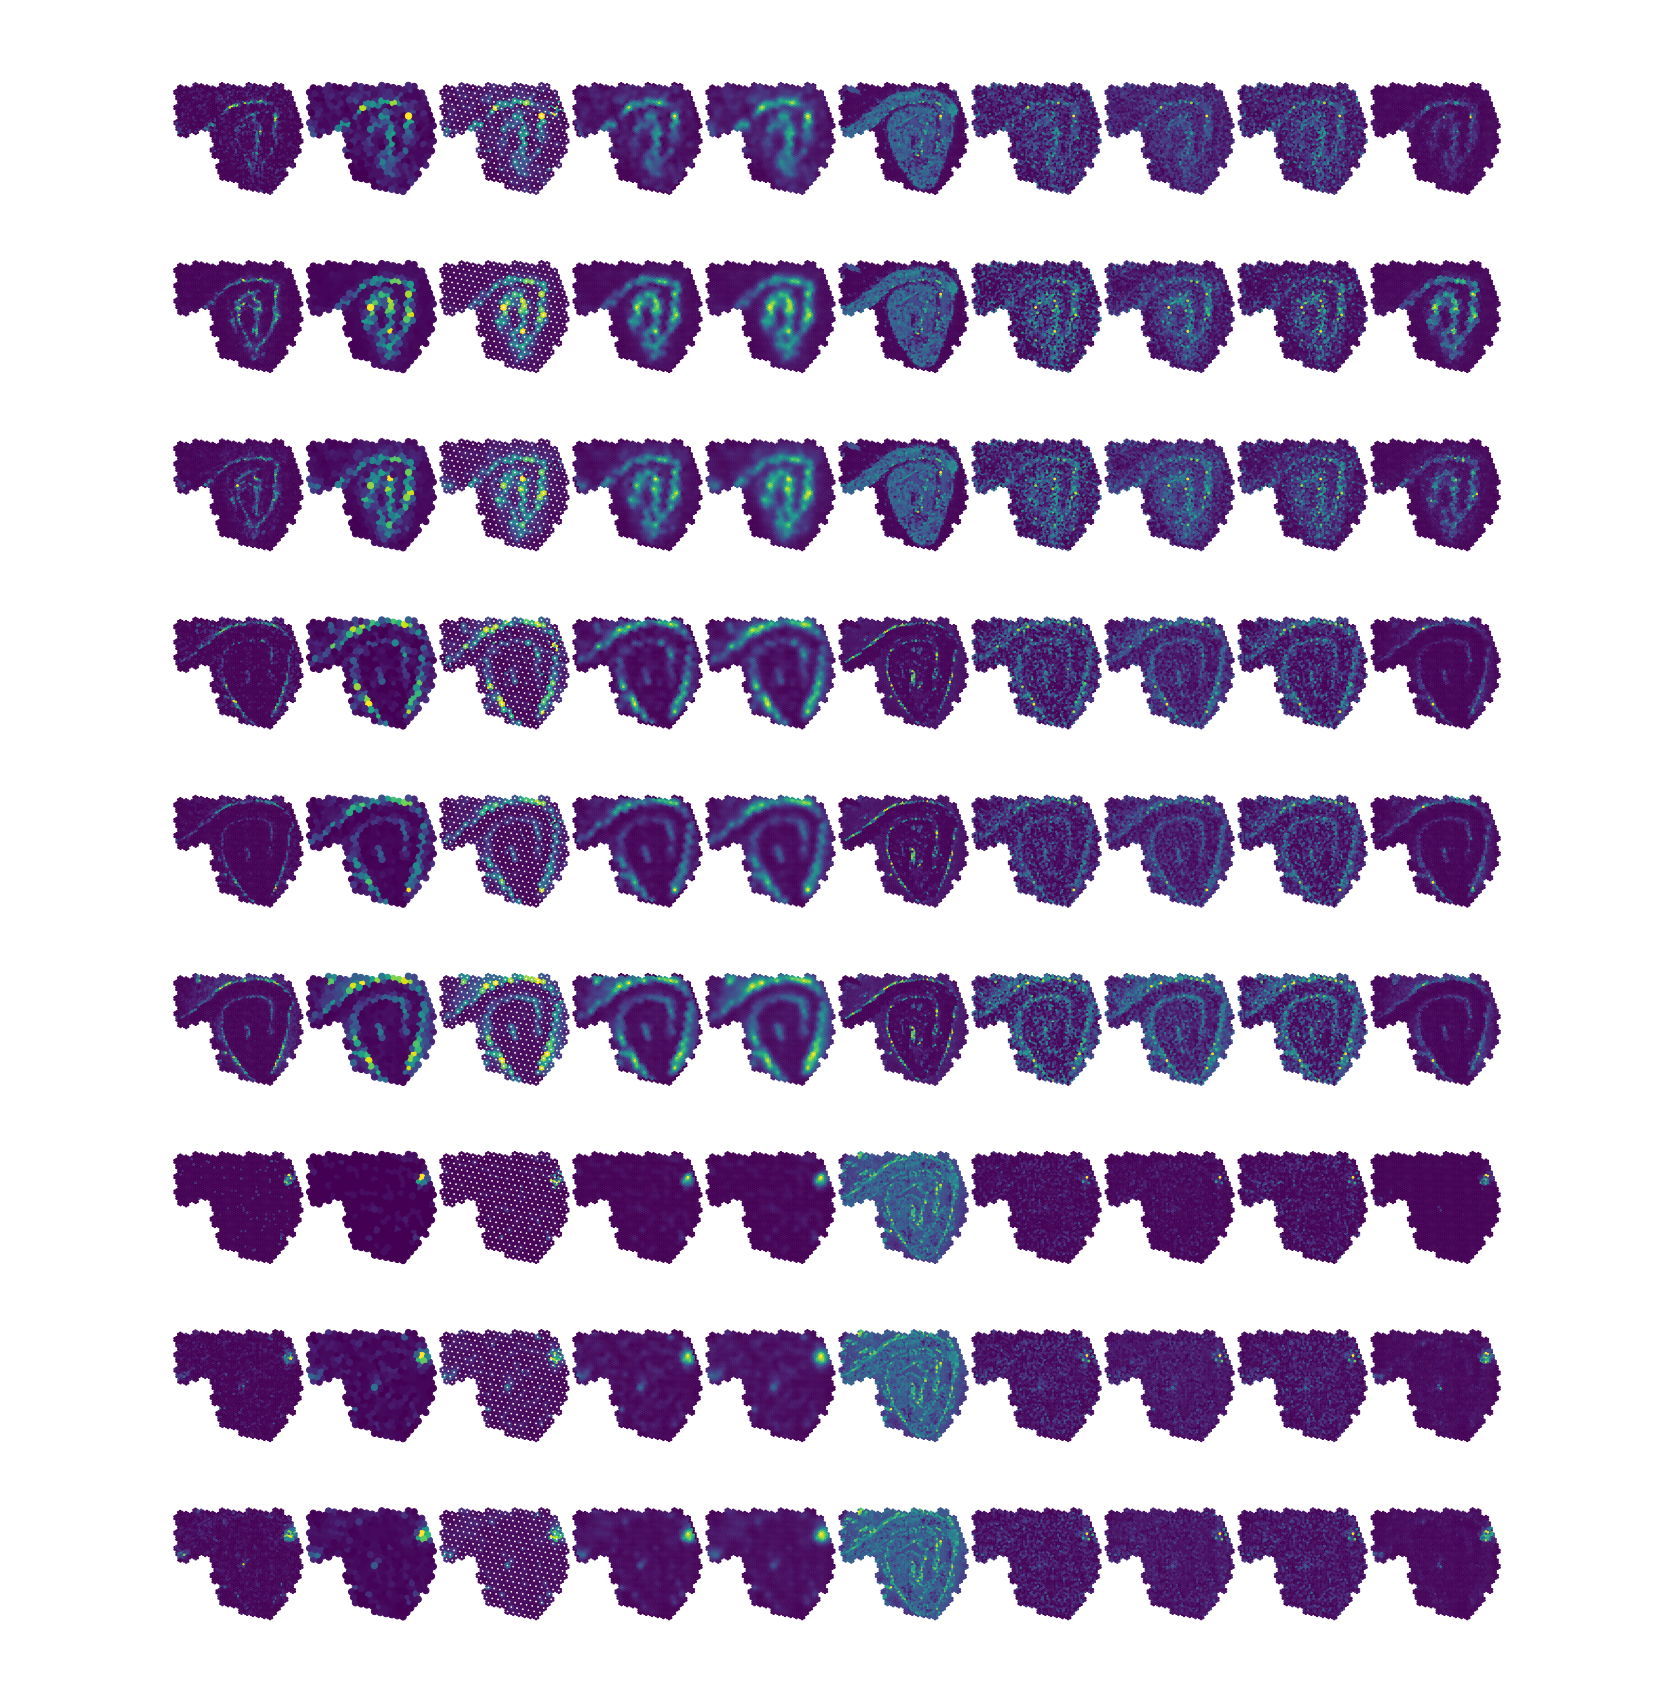

In [15]:
f_, ax_ = plt.subplots(figsize=(24, 24))
plt.axis("equal")
cmap='viridis'
for i in range(len(genes)):
    gene = genes[i]

    exp_gt = data[gene]
    print(f'------------------{gene}-------------------------')
    exp_gt_q = slicing(exp_gt)
    exp_control = data_control[gene]
    exp_ours = data_ours[gene]

    exp_spatial_1 = data_spatial_1_sorted[gene]
    exp_spatial_2 = data_spatial_2[gene]
    exp_spatial_3 = data_spatial_3[gene]
    
    exp_cross_0 = data_cross_0[gene]
    exp_cross_1 = data_cross_1[gene]
    exp_cross_2 = data_cross_2[gene]
    exp_cross_3 = data_cross_3[gene]


    size = 3
    size_ = 40
    img_00 = plt.scatter(0 * width + row, -i*height + col, s=size,
                        marker='o',
                        c=exp_gt,
                        cmap=cmap, vmin=0)

    img_10 = plt.scatter(1 * width + row_r, -i*height + col_r, s=size_,
                        marker='o',
                        c=exp_control,
                        cmap=cmap, vmin=0)

    img_03 = plt.scatter(2 * width + row_q, -i*height + col_q, s=size,
                        marker='o',
                        c=7*exp_spatial_1,
                        cmap=cmap, vmin=0)

    img_03 = plt.scatter(3 * width + row, -i*height + col, s=size,
                        marker='o',
                        c=exp_spatial_2,
                        cmap=cmap, vmin=0)

    img_03 = plt.scatter(4 * width + row, -i*height + col, s=size,
                        marker='o',
                        c=exp_spatial_3,
                        cmap=cmap, vmin=0)
    
    img_01 = plt.scatter(5 * width + row, -i*height + col, s=size,
                        marker='o',
                        c=exp_cross_0,
                        cmap=cmap, vmin=0)
    
    img_03 = plt.scatter(6 * width + row, -i*height + col, s=size,
                        marker='o',
                        c=exp_cross_1,
                        cmap=cmap, vmin=0)

    img_03 = plt.scatter(7 * width + row, -i*height + col, s=size,
                        marker='o',
                        c=exp_cross_2,
                        cmap=cmap, vmin=0)

    img_03 = plt.scatter(8 * width + row, -i*height + col, s=size,
                        marker='o',
                        c=exp_cross_3,
                        cmap=cmap, vmin=0)

    img_20 = plt.scatter(9 * width + row, -i*height + col, s=size,
                    marker='o',
                    c=exp_ours,
                        cmap=cmap, vmin=0)

plt.tight_layout()
plt.axis('off')
plt.savefig(f'../paper/NNfig/Fig2/supp/{project_name}_{exp_name}_all.png', pad_inches=0)
plt.show()

# Fig 2c | Spatial visualization of marker gene expressions

------------------MT1G-------------------------
------------------CNN1-------------------------
------------------HLA-DRA-------------------------


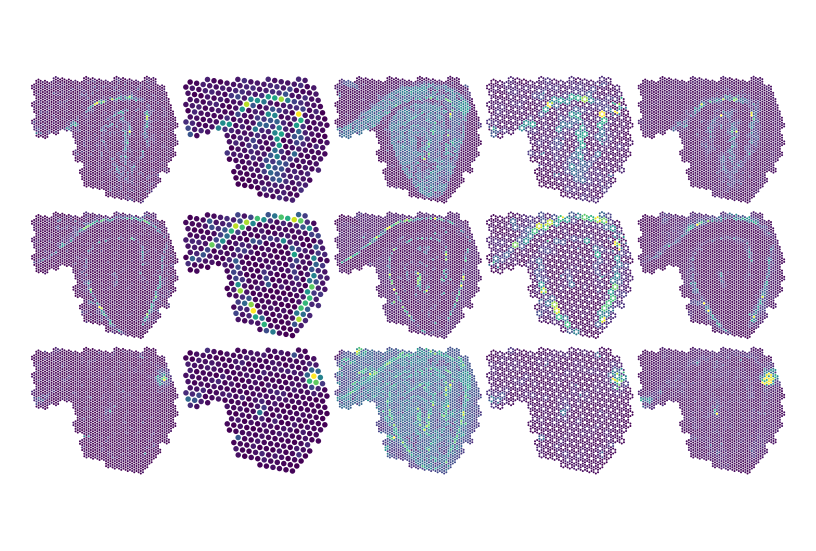

In [16]:
width = 3 / 2 * np.mean(row)
height = np.mean(col)

f_, ax_ = plt.subplots(figsize=(12, 8))
plt.axis("equal")
genes_roi = ['MT1G', 'CNN1', 'HLA-DRA']

def step_norm_t(array, t=0):
    norm_array = min_max_norm(array)
    return np.array([int(l > t) for l in norm_array])

vmax_list = [12, 12, 8]
for i in range(len(genes_roi)):
    gene = genes_roi[i]

    exp_gt = data[gene]
    print(f'------------------{gene}-------------------------')
    exp_gt_q = slicing(exp_gt)
    exp_control = data_control[gene]
    exp_ours = data_ours[gene]

    exp_spatial_1 = data_spatial_1_sorted[gene]
    exp_spatial_2 = data_spatial_2[gene]
    exp_spatial_3 = data_spatial_3[gene]
    
    exp_cross_0 = data_cross_0[gene]
    exp_cross_1 = data_cross_1[gene]
    exp_cross_2 = data_cross_2[gene]
    exp_cross_3 = data_cross_3[gene]


    size = 4
    size_ = 30
#     img_00 = plt.scatter(0 * width + row, -i*height + col, s=size,
#                         marker='o',
#                         c=exp_gt,
#                         cmap=cmap, vmin=0.15*np.max(exp_gt))

#     img_10 = plt.scatter(1 * width + row_r, -i*height + col_r, s=size_,
#                         marker='o',
#                         c=exp_control,
#                         cmap=cmap, vmin=0.15*np.max(exp_control))

#     img_01 = plt.scatter(2 * width + row, -i*height + col, s=size,
#                         marker='o',
#                         c=exp_cross_0,
#                         cmap=cmap, vmin=0.15*np.max(exp_cross_0))

#     img_03 = plt.scatter(3 * width + row_q, -i*height + col_q, s=size,
#                         marker='o',
#                         c=7*exp_spatial_1,
#                         cmap=cmap, vmin=0.15*np.max(exp_spatial_1))

#     img_20 = plt.scatter(4 * width + row, -i*height + col, s=size,
#                     marker='o',
#                     c=exp_ours,
#                         cmap=cmap, vmin=0.15*np.max(exp_ours), vmax=vmax_list[i])
    
    
    img_00 = plt.scatter(0 * width + row, -i*height + col, s=size,
                        marker='o',
                        c=exp_gt,
                         linewidths=0,
                        cmap=cmap, vmin=0)

    img_10 = plt.scatter(1 * width + row_r, -i*height + col_r, s=size_,
                        marker='o',
                        c=exp_control,
                         linewidths=0,
                        cmap=cmap, vmin=0)

    img_01 = plt.scatter(2 * width + row, -i*height + col, s=size,
                        marker='o',
                        c=exp_cross_0,
                         linewidths=0,
                        cmap=cmap, vmin=0)

    img_03 = plt.scatter(3 * width + row_q, -i*height + col_q, s=size,
                        marker='o',
                        c=7*exp_spatial_1,
                         linewidths=0,
                        cmap=cmap, vmin=0)

    img_20 = plt.scatter(4 * width + row, -i*height + col, s=size,
                    marker='o',
                    c=exp_ours,
                         linewidths=0,
                        cmap=cmap, vmin=0, vmax=vmax_list[i])

plt.tight_layout()
plt.axis('off')
plt.savefig(f'../paper/NNfig/Fig2/{project_name}_{exp_name}_ROI.png', pad_inches=0)
plt.savefig(f'../paper/NNfig/Fig2/{project_name}_{exp_name}_ROI_3.pdf', pad_inches=0)
plt.show()

# Fig 2d | Evaluation of resolution enhancement performance

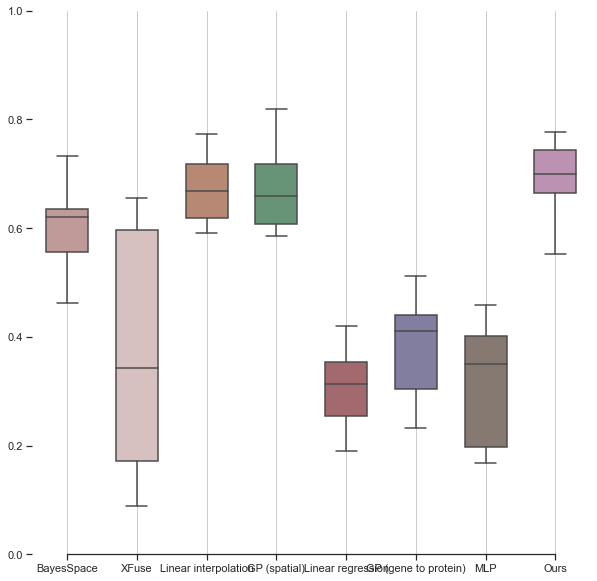

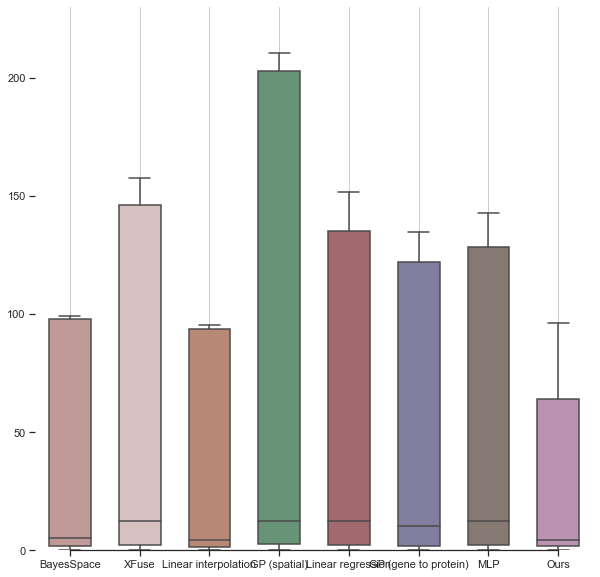

In [17]:
df_pearson = {
    'method':
    ['BayesSpace'] * len(pearson_spatial_1_list)
     + ['XFuse'] * len(pearson_cross_0_list)
    + ['Linear interpolation'] * len(pearson_spatial_2_list)
    + ['GP (spatial)'] * len(pearson_spatial_3_list)
    + ['Linear regression'] * len(pearson_cross_1_list)
    + ['GP (gene to protein)'] * len(pearson_cross_2_list)
    + ['MLP'] * len(pearson_cross_3_list)
    + ['Ours'] * len(pearson_ours_list),
    'value': pearson_spatial_1_list + pearson_cross_0_list + pearson_spatial_2_list + pearson_spatial_3_list
    + pearson_cross_1_list + pearson_cross_2_list + pearson_cross_3_list + pearson_ours_list,
}

# df_spearman = {
#     'method': 
#     ['BayesSpace'] * len(spearman_spatial_1_list)
#     + ['Linear interpolation'] * len(spearman_spatial_2_list)
#     + ['GP (spatial)'] * len(spearman_spatial_3_list)
#     + ['XFuse'] * len(spearman_cross_0_list)
#     + ['Linear regression'] * len(spearman_cross_1_list)
#     + ['GP (gene to protein)'] * len(spearman_cross_2_list)
#     + ['MLP'] * len(spearman_cross_3_list)
#     + ['Ours'] * len(spearman_ours_list),
#     'value': spearman_spatial_1_list + spearman_spatial_2_list + spearman_spatial_3_list
#     + spearman_cross_0_list + spearman_cross_1_list + spearman_cross_2_list + spearman_cross_3_list + spearman_ours_list,
# }

df_mse = {
    'method': 
    ['BayesSpace'] * len(mse_spatial_1_list)
    + ['XFuse'] * len(mse_cross_0_list)
    + ['Linear interpolation'] * len(mse_spatial_2_list)
    + ['GP (spatial)'] * len(mse_spatial_3_list)
    + ['Linear regression'] * len(mse_cross_1_list)
    + ['GP (gene to protein)'] * len(mse_cross_2_list)
    + ['MLP'] * len(mse_cross_3_list)
    + ['Ours'] * len(mse_ours_list),
    'value': mse_spatial_1_list + mse_cross_0_list + mse_spatial_2_list + mse_spatial_3_list
    + mse_cross_1_list + mse_cross_2_list + mse_cross_3_list + mse_ours_list,
}

# df_wd = {
#     'method': 
#     ['BayesSpace'] * len(wd_spatial_1_list)
#     + ['Linear interpolation'] * len(wd_spatial_2_list)
#     + ['GP (spatial)'] * len(wd_spatial_3_list)
#     + ['XFuse'] * len(wd_cross_0_list)
#     + ['Linear regression'] * len(wd_cross_1_list)
#     + ['GP (gene to protein)'] * len(wd_cross_2_list)
#     + ['MLP'] * len(wd_cross_3_list)
#     + ['Ours'] * len(wd_ours_list),
#     'value': wd_spatial_1_list + wd_spatial_2_list + wd_spatial_3_list
#     + wd_cross_0_list + wd_cross_1_list + wd_cross_2_list + wd_cross_3_list + wd_ours_list,
# }


color_list = [[198, 148, 146], [219,189,188], [194, 131, 105], [96, 154, 116], [171, 96, 103], 
               [126, 120, 164], [138, 120, 109], [194, 139, 182]]
color_x = [f'#{hex(i[0])[2:]}{hex(i[1])[2:]}{hex(i[2])[2:]}' for i in color_list]


sns.set_theme(style="ticks")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="method", y="value", data=df_pearson,
            width=.6, palette=color_x)
# Tweak the visual presentation
ax.set(ylim=(0, 1))
ax.xaxis.grid(True)
sns.despine(trim=True, left=True)
plt.savefig(f'../paper/NNfig/Fig2/{project_name}_pearson.pdf')
plt.show()

sns.set_theme(style="ticks")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="method", y="value", data=df_mse,
            width=.6, palette=color_x)
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylim=(0, 230))
sns.despine(trim=True, left=True)
plt.savefig(f'../paper/NNfig/Fig2/{project_name}_mse.pdf')
plt.show()


In [18]:
def slicing_df(df, a=6, b=7):
    """
    get array sliced with q in (0, 1]
    Args:
        array: a numpy array with length of len.
        q: a ratio determining how many elements to remain.

    Returns: array[ : int(q*len)]
    """
    array = df.values
    key = df.keys()
    reult = np.zeros((array.shape[0]*a//b, array.shape[1]))
    for i in range(len(array)//b):
        slice_ = array[i*b:i*b+b]
        new_array = slice_[:a]
        reult[i*a:i*a+a] = new_array
    reult_df = pd.DataFrame(reult, columns=key)
    return reult_df


data_q = slicing_df(data)
data_q

,MT1G,FABP1,EPCAM,CNN1,MYH11,TAGLN,PTPRC,HLA-DRA,CD74
0,1.0,15.0,15.0,0.0,2.0,2.0,0.0,0.0,2.0
1,1.0,12.0,8.0,0.0,0.0,2.0,0.0,0.0,0.0
2,1.0,18.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,16.0,5.0,2.0,0.0,1.0,0.0,0.0,0.0
4,2.0,24.0,5.0,0.0,1.0,1.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...
2071,2.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
2072,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2073,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2074,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Supp Fig 3 | Evaluation of regional enrichments

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def min_max_norm(exp):
    return (exp - np.min(exp))/(np.max(exp) - np.min(exp))

In [20]:
data_0 = pd.read_csv(f'result/{project_name}/reordered_count.csv', index_col=0).clip(lower=0)
data_1 = pd.read_csv(f'result/{project_name}/a1_XFuse_SR.csv', index_col=0).clip(lower=0)
data_2 = pd.read_csv(f'result/{project_name}/bayesspace_sorted.csv', index_col=0).clip(lower=0)
data_3 = pd.read_csv(f'result/{project_name}/ours.csv').clip(lower=0)



data_4 = pd.read_csv(f'result/{project_name}/interpolation_linear.csv').clip(lower=0)
data_5 = pd.read_csv(f'result/{project_name}/gp.csv').clip(lower=0)
data_6 = pd.read_csv(f'result/{project_name}/g2p_linear.csv').clip(lower=0)
data_7 = pd.read_csv(f'result/{project_name}/g2p_gaussian_process_2.csv').clip(lower=0)
data_8 = pd.read_csv(f'result/{project_name}/g2p_mlp_32.csv').clip(lower=0)


# data = data.clip(lower=0)
# data_spatial_1 = data_spatial_1.clip(lower=0)
# data_spatial_2 = data_spatial_2.clip(lower=0)
# data_spatial_3 = data_spatial_3.clip(lower=0)
# data_cross_0 = data_cross_0.clip(lower=0)
# data_cross_1 = data_cross_1.clip(lower=0)
# data_cross_2 = data_cross_2.clip(lower=0)
# data_cross_3 = data_cross_3.clip(lower=0)
# data_ours = data_ours.clip(lower=0)
# data_control = data_control.clip(lower=0)

In [21]:
from scipy.stats import kstest

def plot_diff_boxplot_all(data_list, data_file, target_region, genes, filter_out, norm=False, vmax=1):
    sns.set_theme(style="ticks")
    f, ax = plt.subplots(figsize=(20, 7))
    df_exp = {
        'value':[],
        'method':[],
        'region':[]
    }
    for i in range(len(data_list)):
        hr_expression = data_list[i]
        label = np.load(f'result/{project_name}/reordered_label.npy')
        gt_label_ = label == target_region
        f_gt_label_= label != target_region
        if filter_out[i]:
            gt_label_ = slicing(gt_label_, a=6, b=7)
            f_gt_label_ = slicing(f_gt_label_, a=6, b=7)
        hr_expression['gt_label'] = gt_label_
        j = 0
        for g in genes:
            j += 1
            exp_0 = hr_expression[g].tolist()
            if norm:
                exp_0 = min_max_norm(hr_expression[g]).tolist()
            
            
            exp_in = np.array(exp_0)[gt_label_]
            exp_out = np.array(exp_0)[f_gt_label_]
            
            test_stat = kstest(exp_in, exp_out)
            print(f'{data_file[i]} {g} KS test: {test_stat}')
            
            df_exp['value'] += exp_0
            df_exp['method'] += [data_file[i]] * len(exp_0)
            df_exp['region'] += hr_expression['gt_label'].tolist()
    df_exp = pd.DataFrame(df_exp)
    sns.boxplot(data=df_exp, x="method", y="value", hue="region", linewidth=1)
    ax.set(ylim=(0, vmax))
    sns.despine(trim=True, left=True)
    plt.savefig(f'../paper/NNfig/Fig2/supp/A1_inner_outer_{g}_{target_region}.pdf')
    plt.show()
    return 0

xfuse MT1G KS test: KstestResult(statistic=0.3945415871101732, pvalue=1.6021769195851518e-55, statistic_location=0.5045754, statistic_sign=-1)
bs MT1G KS test: KstestResult(statistic=0.57241856455857, pvalue=3.205594177775018e-104, statistic_location=0.7142452, statistic_sign=-1)
LL MT1G KS test: KstestResult(statistic=0.6862710615348541, pvalue=2.905343022417166e-180, statistic_location=0.777077282625983, statistic_sign=-1)
spatial GP MT1G KS test: KstestResult(statistic=0.6714295883160821, pvalue=1.3804208800415476e-171, statistic_location=0.0107742103083431, statistic_sign=-1)
LRM MT1G KS test: KstestResult(statistic=0.32072153552406796, pvalue=1.8404417848523023e-36, statistic_location=0.842423060428604, statistic_sign=-1)
GP MT1G KS test: KstestResult(statistic=0.43278313737312835, pvalue=3.7550306328264144e-67, statistic_location=0.7998592473195938, statistic_sign=-1)
MLP MT1G KS test: KstestResult(statistic=0.3648816701839011, pvalue=2.438848065007206e-47, statistic_location=0.8

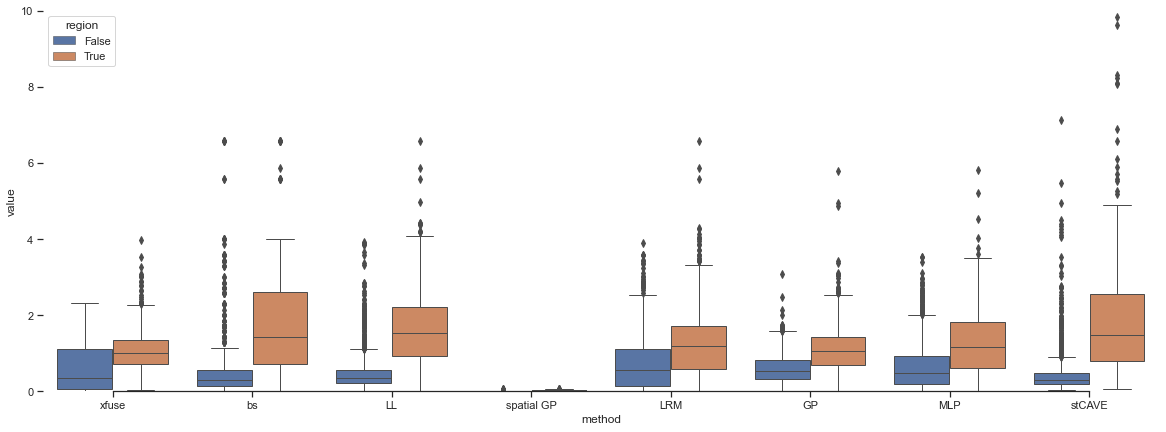

xfuse FABP1 KS test: KstestResult(statistic=0.3946023012762536, pvalue=1.5386325652233457e-55, statistic_location=14.46052, statistic_sign=-1)
bs FABP1 KS test: KstestResult(statistic=0.7760241811087923, pvalue=7.817479835169056e-207, statistic_location=7.976943493, statistic_sign=-1)
LL FABP1 KS test: KstestResult(statistic=0.7807527719157203, pvalue=1.23216441470437e-243, statistic_location=18.6103938824671, statistic_sign=-1)
spatial GP FABP1 KS test: KstestResult(statistic=0.7846363849529361, pvalue=1.3510982561985414e-246, statistic_location=0.2531679985131649, statistic_sign=-1)
LRM FABP1 KS test: KstestResult(statistic=0.355138093323954, pvalue=8.315259063064058e-45, statistic_location=20.755888526505743, statistic_sign=-1)
GP FABP1 KS test: KstestResult(statistic=0.5093625431279938, pvalue=2.5859730166691185e-94, statistic_location=16.365173661288722, statistic_sign=-1)
MLP FABP1 KS test: KstestResult(statistic=0.42948573007737917, pvalue=4.2357809877949044e-66, statistic_locat

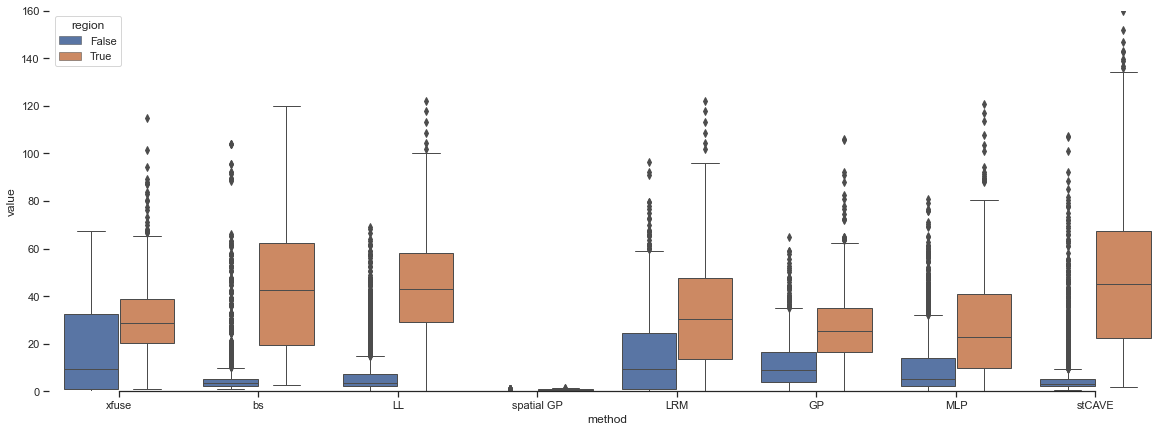

xfuse EPCAM KS test: KstestResult(statistic=0.3951215120758383, pvalue=1.0900045107683704e-55, statistic_location=5.1420584, statistic_sign=-1)
bs EPCAM KS test: KstestResult(statistic=0.6600523999637057, pvalue=2.5883329134238952e-142, statistic_location=5.719887733, statistic_sign=-1)
LL EPCAM KS test: KstestResult(statistic=0.7588517066961444, pvalue=1.5110857672222551e-227, statistic_location=8.0830528258312, statistic_sign=-1)
spatial GP EPCAM KS test: KstestResult(statistic=0.7607464073962416, pvalue=6.730899926374134e-229, statistic_location=0.1230309688397879, statistic_sign=-1)
LRM EPCAM KS test: KstestResult(statistic=0.3776463002043346, pvalue=8.970010971915833e-51, statistic_location=8.788430681605801, statistic_sign=-1)
GP EPCAM KS test: KstestResult(statistic=0.5011765986668006, pvalue=3.7575068094579685e-91, statistic_location=7.105109997813452, statistic_sign=-1)
MLP EPCAM KS test: KstestResult(statistic=0.4032969885773624, pvalue=4.4449134788826566e-58, statistic_locat

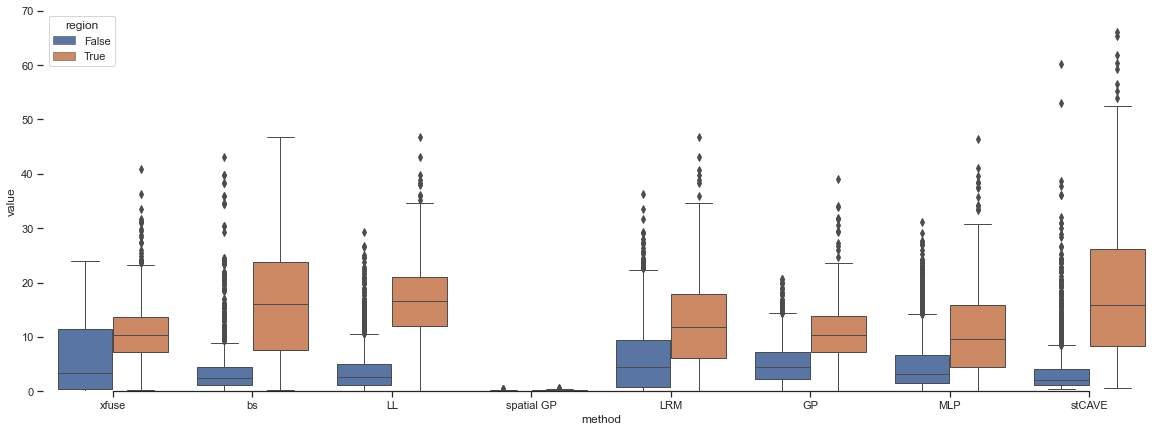

0

In [22]:
data_list_ = [data_1, data_2, data_4, data_5, data_6, data_7, data_8, data_3]
flag_list_ = [False, True, False, False, False, False, False, False]
data_file_ = ['xfuse', 'bs', 'LL', 'spatial GP', 'LRM', 'GP', 'MLP', 'stCAVE']

plot_diff_boxplot_all(data_list_, data_file_, 2, ['MT1G'], flag_list_, vmax=10)
plot_diff_boxplot_all(data_list_, data_file_, 2, ['FABP1'], flag_list_, vmax=160)
plot_diff_boxplot_all(data_list_, data_file_, 2, ['EPCAM'], flag_list_, vmax=70)

xfuse CNN1 KS test: KstestResult(statistic=0.6734194122885129, pvalue=7.38331386102836e-73, statistic_location=0.1743454, statistic_sign=-1)
bs CNN1 KS test: KstestResult(statistic=0.6449283291388554, pvalue=4.239531174752208e-57, statistic_location=0.711939514, statistic_sign=-1)
LL CNN1 KS test: KstestResult(statistic=0.660097749534526, pvalue=1.279031396457998e-69, statistic_location=0.7331151663456023, statistic_sign=-1)
spatial GP CNN1 KS test: KstestResult(statistic=0.6351442969319193, pvalue=7.763711002115831e-64, statistic_location=0.010907035624277, statistic_sign=-1)
LRM CNN1 KS test: KstestResult(statistic=0.4826914514692787, pvalue=2.2324767248118206e-35, statistic_location=1.225196646226685, statistic_sign=-1)
GP CNN1 KS test: KstestResult(statistic=0.6412511130899377, pvalue=3.2417351368119037e-65, statistic_location=0.9134988451853738, statistic_sign=-1)
MLP CNN1 KS test: KstestResult(statistic=0.51260321379422, pvalue=3.907637779103659e-40, statistic_location=0.93879484

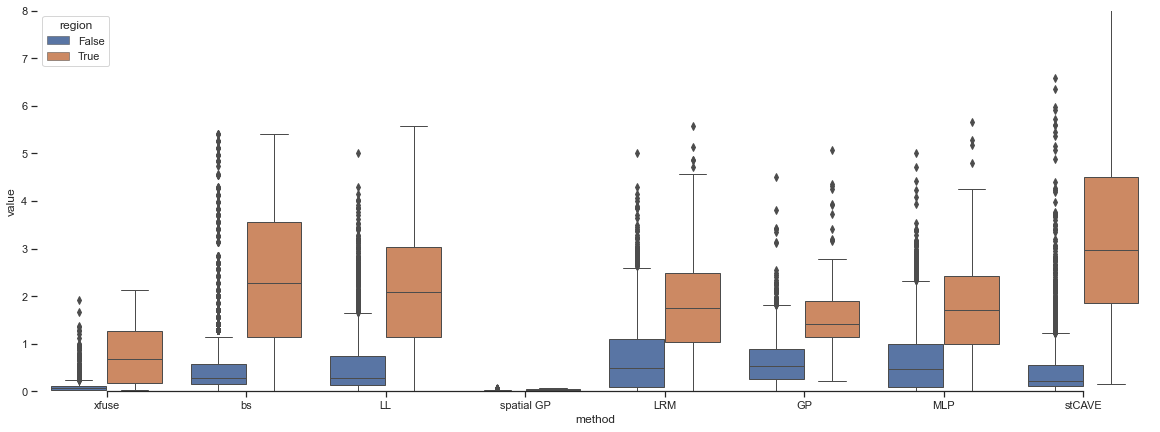

xfuse MYH11 KS test: KstestResult(statistic=0.6926252732129847, pvalue=9.609737711389993e-78, statistic_location=0.33604914, statistic_sign=-1)
bs MYH11 KS test: KstestResult(statistic=0.7406855235802604, pvalue=1.1080181228875735e-78, statistic_location=1.857015371, statistic_sign=-1)
LL MYH11 KS test: KstestResult(statistic=0.6938294341455516, pvalue=4.840876340072402e-78, statistic_location=1.9460405460400527, statistic_sign=-1)
spatial GP MYH11 KS test: KstestResult(statistic=0.6725238808386627, pvalue=1.2291649068025903e-72, statistic_location=0.0332910012699909, statistic_sign=-1)
LRM MYH11 KS test: KstestResult(statistic=0.49313931838419817, pvalue=5.395318626073074e-37, statistic_location=2.250994268044763, statistic_sign=-1)
GP MYH11 KS test: KstestResult(statistic=0.6451317493726221, pvalue=4.164676836984407e-66, statistic_location=2.272358341566993, statistic_sign=-1)
MLP MYH11 KS test: KstestResult(statistic=0.5214016838015058, pvalue=1.3216487458956214e-41, statistic_locat

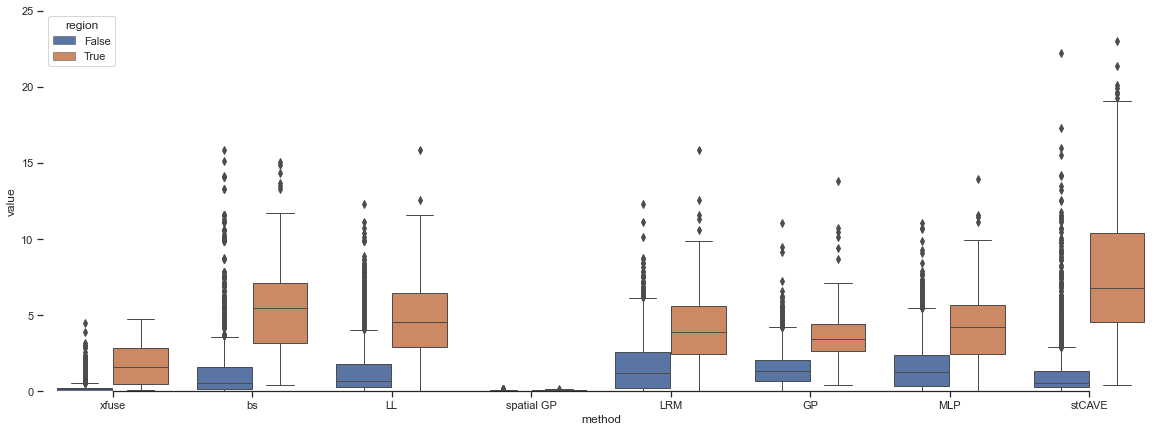

xfuse TAGLN KS test: KstestResult(statistic=0.7127873795839067, pvalue=3.9190702919085556e-83, statistic_location=1.5410049, statistic_sign=-1)
bs TAGLN KS test: KstestResult(statistic=0.6542291279133384, pvalue=5.9715082916677e-59, statistic_location=6.418440342, statistic_sign=-1)
LL TAGLN KS test: KstestResult(statistic=0.6543956933538412, pvalue=2.917577774160379e-68, statistic_location=8.285714286, statistic_sign=-1)
spatial GP TAGLN KS test: KstestResult(statistic=0.6297609892333846, pvalue=1.2277610211700667e-62, statistic_location=0.1284336168809184, statistic_sign=-1)
LRM TAGLN KS test: KstestResult(statistic=0.5092740629806525, pvalue=1.3832921192892762e-39, statistic_location=9.58709342170252, statistic_sign=-1)
GP TAGLN KS test: KstestResult(statistic=0.6459564478264389, pvalue=2.6735359608876753e-66, statistic_location=8.429551067857307, statistic_sign=-1)
MLP TAGLN KS test: KstestResult(statistic=0.5585232332226989, pvalue=3.509330838942248e-48, statistic_location=8.70229

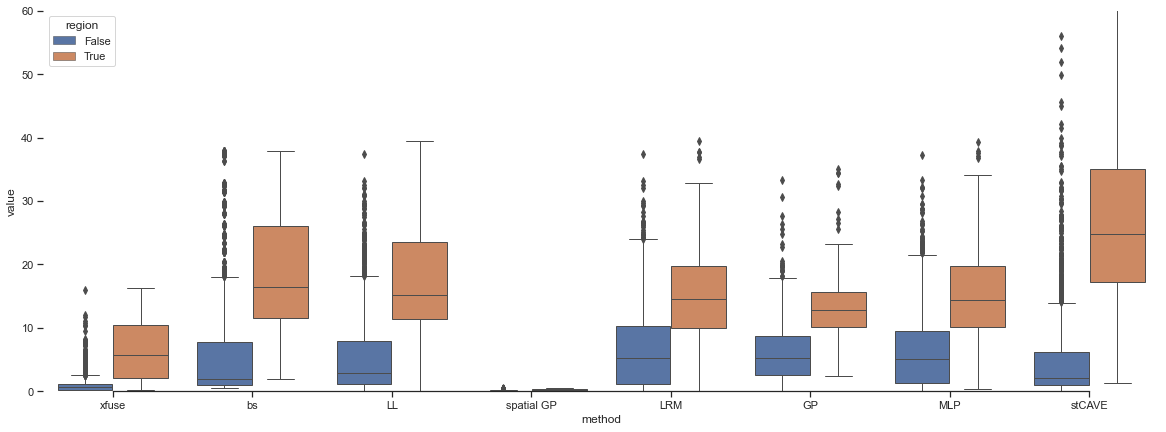

In [23]:
vmax_3 = [8, 25, 60]
gene_list = ['CNN1', 'MYH11', 'TAGLN']
for i in range(3):
    plot_diff_boxplot_all(data_list_, data_file_, 3, [gene_list[i]], flag_list_, vmax=vmax_3[i])

xfuse PTPRC KS test: KstestResult(statistic=0.32221754779600803, pvalue=0.0001401045470859816, statistic_location=0.010125871, statistic_sign=-1)
bs PTPRC KS test: KstestResult(statistic=0.5539783889980353, pvalue=7.801784927775799e-12, statistic_location=0.002023828, statistic_sign=-1)
LL PTPRC KS test: KstestResult(statistic=0.7411770205207311, pvalue=2.3473054588664486e-25, statistic_location=0.1630103057195872, statistic_sign=-1)
spatial GP PTPRC KS test: KstestResult(statistic=0.9268732763053336, pvalue=1.9974924451007147e-49, statistic_location=0.0019920119298159, statistic_sign=-1)
LRM PTPRC KS test: KstestResult(statistic=0.366316084700603, pvalue=8.076459957079006e-06, statistic_location=0.2862269606612082, statistic_sign=-1)
GP PTPRC KS test: KstestResult(statistic=0.436198756602627, pvalue=3.715001244726227e-08, statistic_location=0.1218903736453248, statistic_sign=-1)
MLP PTPRC KS test: KstestResult(statistic=0.2943766652643388, pvalue=0.0006915977254151488, statistic_locat

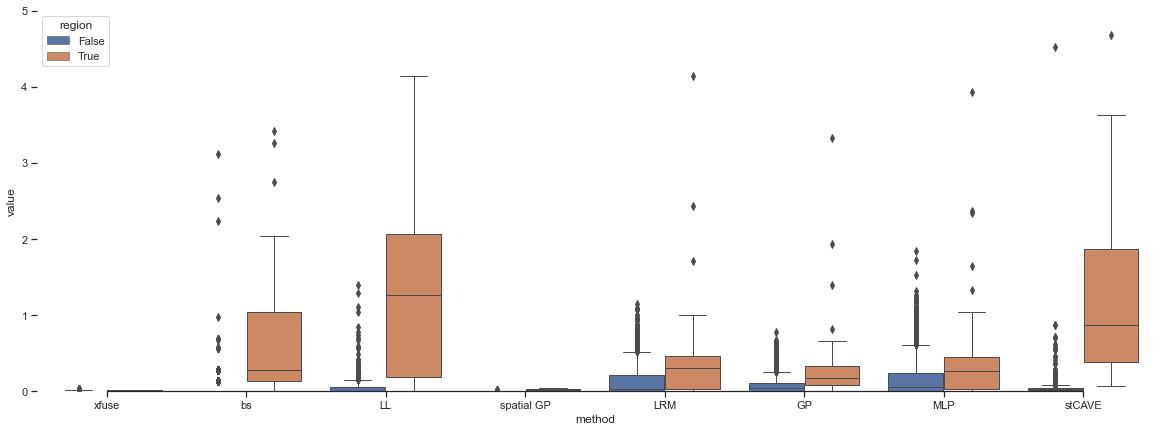

xfuse HLA-DRA KS test: KstestResult(statistic=0.31338288225120364, pvalue=0.0002364877331427228, statistic_location=0.083341956, statistic_sign=-1)
bs HLA-DRA KS test: KstestResult(statistic=0.8052554027504911, pvalue=7.879751745528547e-28, statistic_location=0.999816895, statistic_sign=-1)
LL HLA-DRA KS test: KstestResult(statistic=0.7521151778619174, pvalue=2.815613871486796e-26, statistic_location=1.635728826680371, statistic_sign=-1)
spatial GP HLA-DRA KS test: KstestResult(statistic=0.9268732763053336, pvalue=1.9974924451007147e-49, statistic_location=0.0151431111482604, statistic_sign=-1)
LRM HLA-DRA KS test: KstestResult(statistic=0.3939325947739915, pvalue=1.0963345089894018e-06, statistic_location=1.2033899651308009, statistic_sign=-1)
GP HLA-DRA KS test: KstestResult(statistic=0.45975786472210534, pvalue=4.703723356289175e-09, statistic_location=0.7778309582826157, statistic_sign=-1)
MLP HLA-DRA KS test: KstestResult(statistic=0.3666619922404525, pvalue=7.885504104094839e-06,

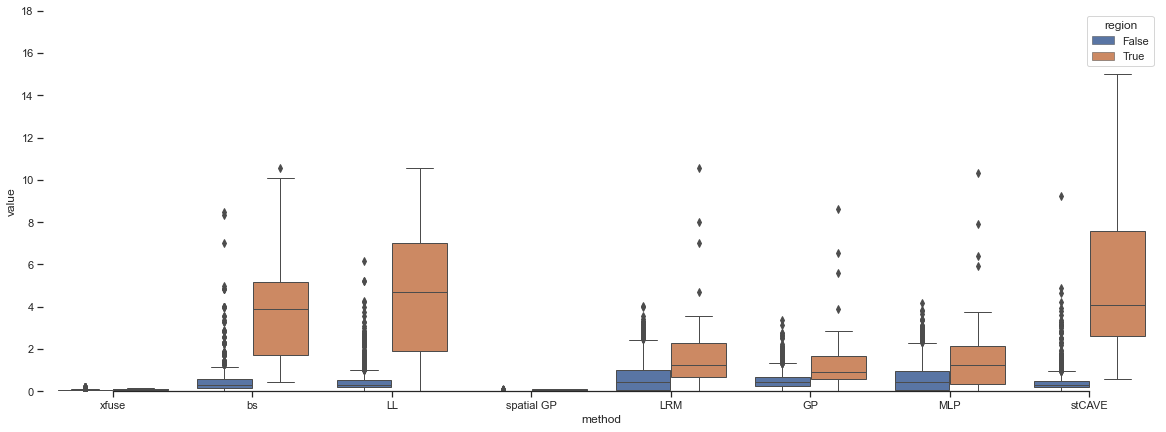

xfuse CD74 KS test: KstestResult(statistic=0.3189174028887954, pvalue=0.00017070467828931145, statistic_location=0.15292855, statistic_sign=-1)
bs CD74 KS test: KstestResult(statistic=0.8396365422396856, pvalue=3.166794943729942e-31, statistic_location=3.633121729, statistic_sign=-1)
LL CD74 KS test: KstestResult(statistic=0.7449633057542187, pvalue=1.1358066828533758e-25, statistic_location=3.266172427600872, statistic_sign=-1)
spatial GP CD74 KS test: KstestResult(statistic=0.9428598139578367, pvalue=1.1613351672466647e-53, statistic_location=0.0436609124605184, statistic_sign=-1)
LRM CD74 KS test: KstestResult(statistic=0.4440424437900248, pvalue=1.8951137908688025e-08, statistic_location=2.8425146440800355, statistic_sign=-1)
GP CD74 KS test: KstestResult(statistic=0.4920488010096761, pvalue=2.227353963860526e-10, statistic_location=1.6247034429478957, statistic_sign=-1)
MLP CD74 KS test: KstestResult(statistic=0.3815360164539803, pvalue=2.74212239671159e-06, statistic_location=3.7

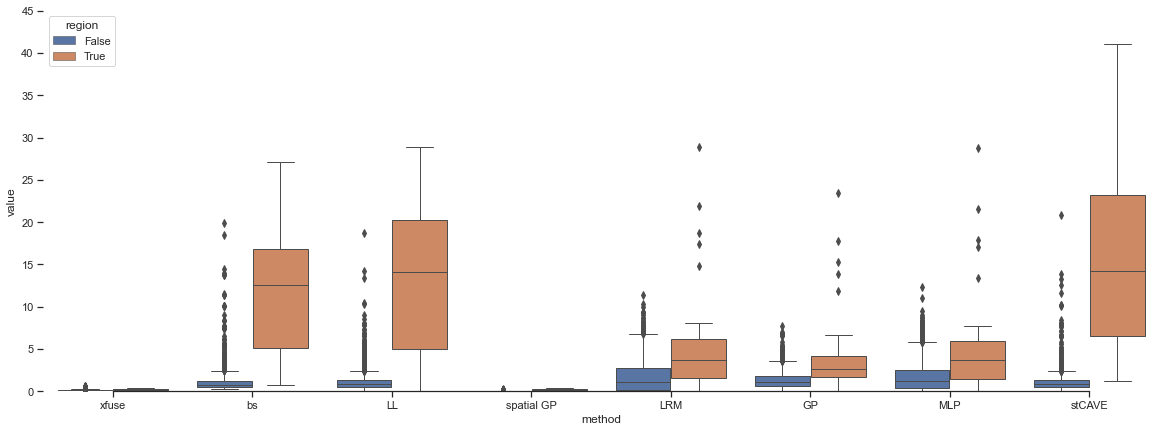

In [24]:
vmax_6 = [5, 18, 45]
gene_list = ['PTPRC', 'HLA-DRA', 'CD74']
for i in range(3):
    plot_diff_boxplot_all(data_list_, data_file_, 6, [gene_list[i]], flag_list_, vmax=vmax_6[i])

In [25]:
def plot_diff_ksd_all(data_list, data_file, target_region_list, genes, filter_out, norm=False, vmax=1):
    sns.set_theme(style="ticks")
    f, ax = plt.subplots(figsize=(20, 7))
    df_ksd = {
        'value':[],
        'method':[]
    }
    for i in range(len(data_list)):
        hr_expression = data_list[i]
        label = np.load(f'result/{project_name}/reordered_label.npy')
       
        j = 0
        for g in genes:
            gt_label_ = label == target_region_list[j]
            f_gt_label_= label != target_region_list[j]
            if filter_out[i]:
                gt_label_ = slicing(gt_label_, a=6, b=7)
                f_gt_label_ = slicing(f_gt_label_, a=6, b=7)
            hr_expression['gt_label'] = gt_label_
            
            
            j += 1
            exp_0 = hr_expression[g].tolist()
            if norm:
                exp_0 = min_max_norm(hr_expression[g]).tolist()
            
            exp_in = np.array(exp_0)[gt_label_]
            exp_out = np.array(exp_0)[f_gt_label_]
            
            test_stat = kstest(exp_in, exp_out)
            print(f'{data_file[i]} {g} KS test: {test_stat.statistic}')
            
            df_ksd['value'] += [test_stat.statistic]
            df_ksd['method'] += [data_file[i]]
    df_ksd = pd.DataFrame(df_ksd)
    sns.boxplot(data=df_ksd, x="method", y="value", linewidth=1)
    ax.set(ylim=(0, vmax))
    sns.despine(trim=True, left=True)
    plt.savefig(f'../paper/NNfig/Fig2/supp/A1_inner_outer_KSD_2.pdf')
    plt.show()
    return 0

# Fig 2e | Evaluation of marker gene enrichments

xfuse MT1G KS test: 0.3945415871101732
xfuse FABP1 KS test: 0.3946023012762536
xfuse EPCAM KS test: 0.3951215120758383
xfuse CNN1 KS test: 0.6734194122885129
xfuse MYH11 KS test: 0.6926252732129847
xfuse TAGLN KS test: 0.7127873795839067
xfuse PTPRC KS test: 0.32221754779600803
xfuse HLA-DRA KS test: 0.31338288225120364
xfuse CD74 KS test: 0.3189174028887954
bs MT1G KS test: 0.57241856455857
bs FABP1 KS test: 0.7760241811087923
bs EPCAM KS test: 0.6600523999637057
bs CNN1 KS test: 0.6449283291388554
bs MYH11 KS test: 0.7406855235802604
bs TAGLN KS test: 0.6542291279133384
bs PTPRC KS test: 0.5539783889980353
bs HLA-DRA KS test: 0.8052554027504911
bs CD74 KS test: 0.8396365422396856
LL MT1G KS test: 0.6862710615348541
LL FABP1 KS test: 0.7807527719157203
LL EPCAM KS test: 0.7588517066961444
LL CNN1 KS test: 0.660097749534526
LL MYH11 KS test: 0.6938294341455516
LL TAGLN KS test: 0.6543956933538412
LL PTPRC KS test: 0.7411770205207311
LL HLA-DRA KS test: 0.7521151778619174
LL CD74 KS tes

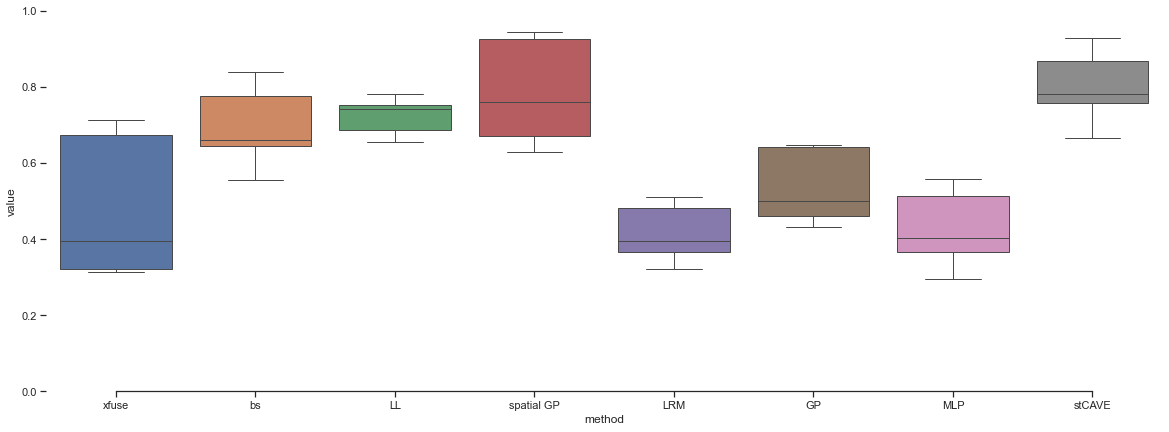

0

In [26]:
data_list_all = [data_1, data_2, data_4, data_5, data_6, data_7, data_8, data_3]
flag_list_all = [False, True, False, False, False, False, False, False]
data_file_all = ['xfuse', 'bs', 'LL', 'spatial GP', 'LRM', 'GP', 'MLP', 'stCAVE']

gene_list = ['MT1G', 'FABP1', 'EPCAM'] + ['CNN1', 'MYH11', 'TAGLN'] + ['PTPRC', 'HLA-DRA', 'CD74']
plot_diff_ksd_all(data_list_all, data_file_all, [2, 2, 2, 3, 3, 3, 6, 6, 6], gene_list, flag_list_all)